<a href="https://colab.research.google.com/github/meisam210905/Sani/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [1]:
import numpy as np
import pandas as pd
from scipy import stats   
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

**Import file to notebook**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving sales_analysis.csv to sales_analysis.csv


**Define data in a dataframe**

In [3]:
df = pd.read_csv('sales_analysis.csv')

**Having an overview of the data**

In [4]:
df.describe()

,Unnamed: 0,order id,quantity ordered,price each,order_total,address_id
count,182735.000000,182735.000000,182735.000000,182735.000000,182735.000000,182735.000000
mean,91367.000000,230533.878463,1.124333,184.315392,185.403890,64834.191594
std,52751.195058,51543.205104,0.442937,332.684344,332.877445,39789.227642
min,0.000000,141234.000000,1.000000,2.990000,2.990000,0.000000
25%,45683.500000,185954.500000,1.000000,11.950000,11.950000,30099.500000
50%,91367.000000,230485.000000,1.000000,14.950000,14.950000,62576.000000
75%,137050.500000,275220.500000,1.000000,150.000000,150.000000,98368.500000
max,182734.000000,319670.000000,9.000000,1700.000000,3400.000000,138945.000000


In [5]:
df.head()

,Unnamed: 0,order id,product,quantity ordered,price each,order_total,order date,purchase address,city,state,address_id
0,0,236670,Wired Headphones,2,11.99,23.98,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",Seattle,WA,0
1,1,236671,Bose SoundSport Headphones,1,99.99,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",Dallas,TX,1
2,2,236672,iPhone,1,700.00,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",Portland,OR,2
3,3,236673,AA Batteries (4-pack),2,3.84,7.68,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",Los Angeles,CA,3
4,4,236674,AA Batteries (4-pack),2,3.84,7.68,08/15/19 19:53,"736 14th St, New York City, NY 10001",New York City,NY,4


**Several rows are completely blank, drop empty rows where all rows are blank**

In [6]:
df = df.dropna(how='all')

**Several rows are a copy of the header, delete all rows where header values are present**

In [7]:
df = df.drop(df[df['order id'] == 'Order ID'].index)

**Index values were lost in the processing of dropping rows, reset index values**

In [8]:
df.reset_index(drop = True, inplace = True)

**Convert quantity ordered and price each to numeric values to facilitate later calculations**

In [9]:
df['quantity ordered'] = pd.to_numeric(df['quantity ordered'])
df['price each'] = pd.to_numeric(df['price each'])

**Extract state and city from purchase address these fields may be useful for later visualization and market segmentation**

In [10]:
df['state'] = df['purchase address'].str.split(',').str[2].str.strip().str[0:2]
df['city'] = df['purchase address'].str.split(',').str[1]

**Create an order total column**

In [11]:
df['order_total'] = df['quantity ordered'] * df['price each']

In [12]:
df.head()

,Unnamed: 0,order id,product,quantity ordered,price each,order_total,order date,purchase address,city,state,address_id
0,0,236670,Wired Headphones,2,11.99,23.98,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",Seattle,WA,0
1,1,236671,Bose SoundSport Headphones,1,99.99,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",Dallas,TX,1
2,2,236672,iPhone,1,700.00,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",Portland,OR,2
3,3,236673,AA Batteries (4-pack),2,3.84,7.68,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",Los Angeles,CA,3
4,4,236674,AA Batteries (4-pack),2,3.84,7.68,08/15/19 19:53,"736 14th St, New York City, NY 10001",New York City,NY,4


**Reorder columns**

In [13]:
df = df[['order id', 'product', 'quantity ordered', 'price each', 'order_total', 'order date',
       'purchase address', 'city', 'state']]

In [20]:
df.head()

,order id,product,quantity ordered,price each,order_total,order date,purchase address,city,state,address_id
0,236670,Wired Headphones,2,11.99,23.98,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",Seattle,WA,0
1,236671,Bose SoundSport Headphones,1,99.99,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",Dallas,TX,1
2,236672,iPhone,1,700.00,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",Portland,OR,2
3,236673,AA Batteries (4-pack),2,3.84,7.68,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",Los Angeles,CA,3
4,236674,AA Batteries (4-pack),2,3.84,7.68,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",New York City,NY,4


**total length of column - unique values in the column implies there may be 45163 repeat purchases**

In [14]:
len(df['purchase address']) - df['purchase address'].nunique()

43789

**assign a unique id for each purchase address, use as a proxy for customer_id/address_id**

In [ ]:
df['address_id'] = pd.factorize(df['purchase address'])[0]

**Save the cleaned and transfored dataframe to a new csv. for quick access**

In [16]:
df.to_csv('cleaned_sales_analysis.csv')

**Convert order date to a date time format**

In [17]:
df['order date'] = pd.to_datetime(df['order date'], infer_datetime_format = True)

In [19]:
df.head()

,order id,product,quantity ordered,price each,order_total,order date,purchase address,city,state,address_id
0,236670,Wired Headphones,2,11.99,23.98,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",Seattle,WA,0
1,236671,Bose SoundSport Headphones,1,99.99,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",Dallas,TX,1
2,236672,iPhone,1,700.00,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",Portland,OR,2
3,236673,AA Batteries (4-pack),2,3.84,7.68,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",Los Angeles,CA,3
4,236674,AA Batteries (4-pack),2,3.84,7.68,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",New York City,NY,4


**Create new frame to summarize order quantity by product**

In [21]:
total_ordered_product = df.groupby('product', as_index = False)['quantity ordered'].sum()
total_ordered_product = total_ordered_product.sort_values('product')

In [28]:
df.head()

,order id,product,quantity ordered,price each,order_total,order date,purchase address,city,state,address_id
0,236670,Wired Headphones,2,11.99,23.98,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",Seattle,WA,0
1,236671,Bose SoundSport Headphones,1,99.99,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",Dallas,TX,1
2,236672,iPhone,1,700.00,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",Portland,OR,2
3,236673,AA Batteries (4-pack),2,3.84,7.68,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",Los Angeles,CA,3
4,236674,AA Batteries (4-pack),2,3.84,7.68,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",New York City,NY,4


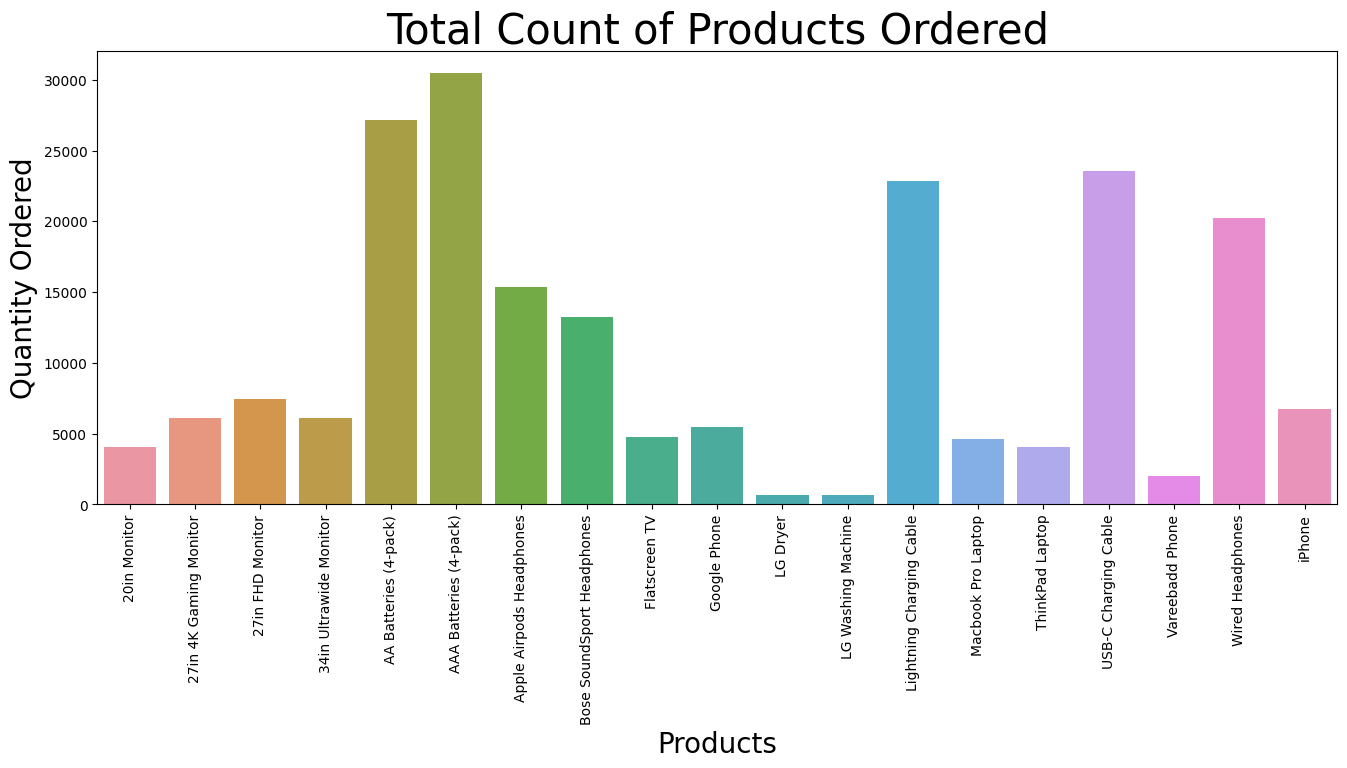

In [29]:
plt.figure(figsize = (16, 6), dpi = 100)
sns.barplot(y = 'quantity ordered', x = 'product', data = total_ordered_product)
plt.xticks(rotation = 90, multialignment = 'right')
plt.title('Total Count of Products Ordered', size = 30)
plt.ylabel('Quantity Ordered', size = 20)
plt.xlabel('Products', size = 20);

**View the chart above in tabular form sorted by highest volume products**

In [31]:
total_ordered_product.sort_values('quantity ordered', ascending = False, ignore_index = True)

,product,quantity ordered
0,AAA Batteries (4-pack),30487
1,AA Batteries (4-pack),27148
2,USB-C Charging Cable,23555
3,Lightning Charging Cable,22841
4,Wired Headphones,20201
5,Apple Airpods Headphones,15383
6,Bose SoundSport Headphones,13236
7,27in FHD Monitor,7429
8,iPhone,6732
9,27in 4K Gaming Monitor,6134


In [32]:
revenue_by_product = df.groupby('product', as_index = False)['order_total'].sum()

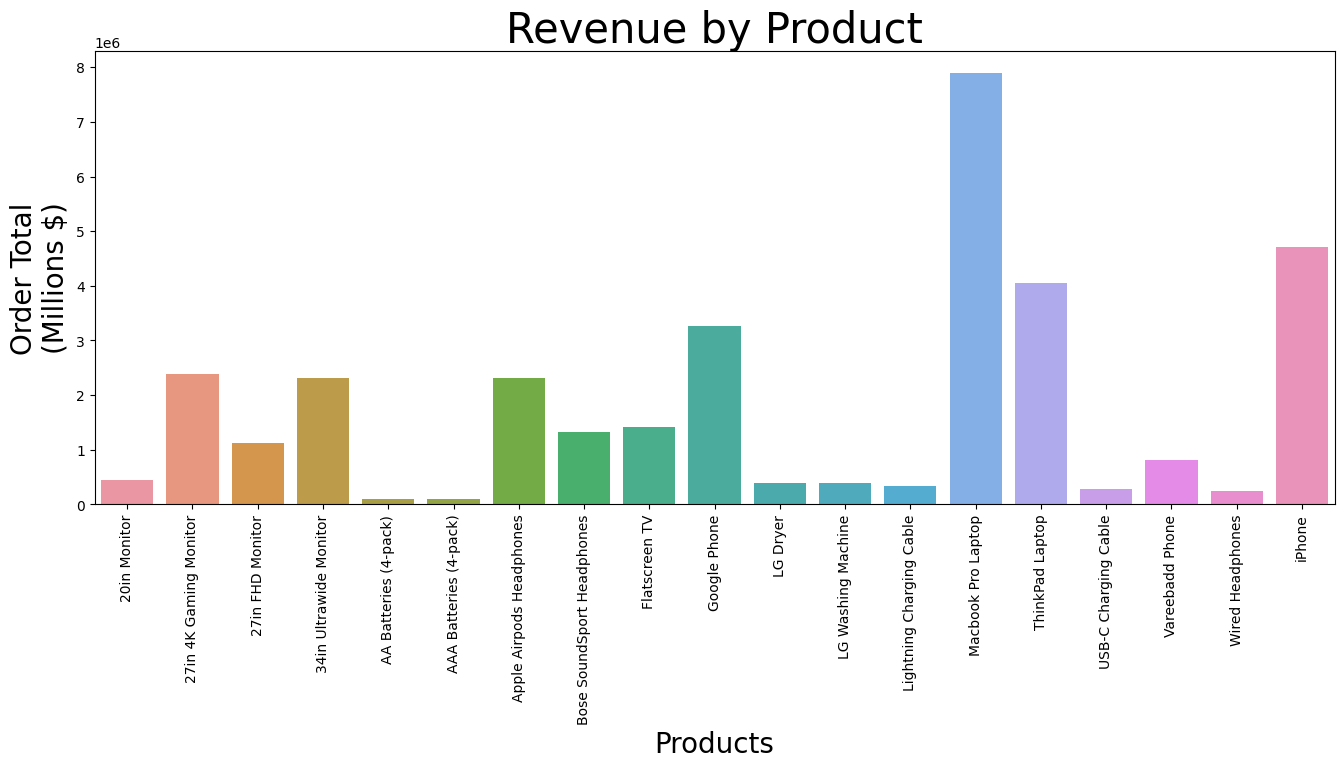

In [38]:
plt.figure(figsize = (16, 6), dpi = 100)
sns.barplot(y = 'order_total', x = 'product', data = revenue_by_product)
plt.xticks(rotation = 90, multialignment = 'right')
plt.title('Revenue by Product', size = 30)
plt.ylabel('Order Total' '\n' '(Millions $)', size = 20)
plt.xlabel('Products', size = 20);

**chart above in tabular form sorted by highest order total**

In [36]:
revenue_by_product.sort_values('order_total', ascending = False, ignore_index = True)

,product,order_total
0,Macbook Pro Laptop,7896500.00
1,iPhone,4712400.00
2,ThinkPad Laptop,4053959.46
3,Google Phone,3264000.00
4,27in 4K Gaming Monitor,2392198.66
5,34in Ultrawide Monitor,2308819.24
6,Apple Airpods Headphones,2307450.00
7,Flatscreen TV,1417200.00
8,Bose SoundSport Headphones,1323467.64
9,27in FHD Monitor,1114275.71


In [37]:
total_ordered_state= df.groupby('state', as_index = False)['quantity ordered'].sum()
total_ordered_city = df.groupby('city', as_index = False)['quantity ordered'].sum()

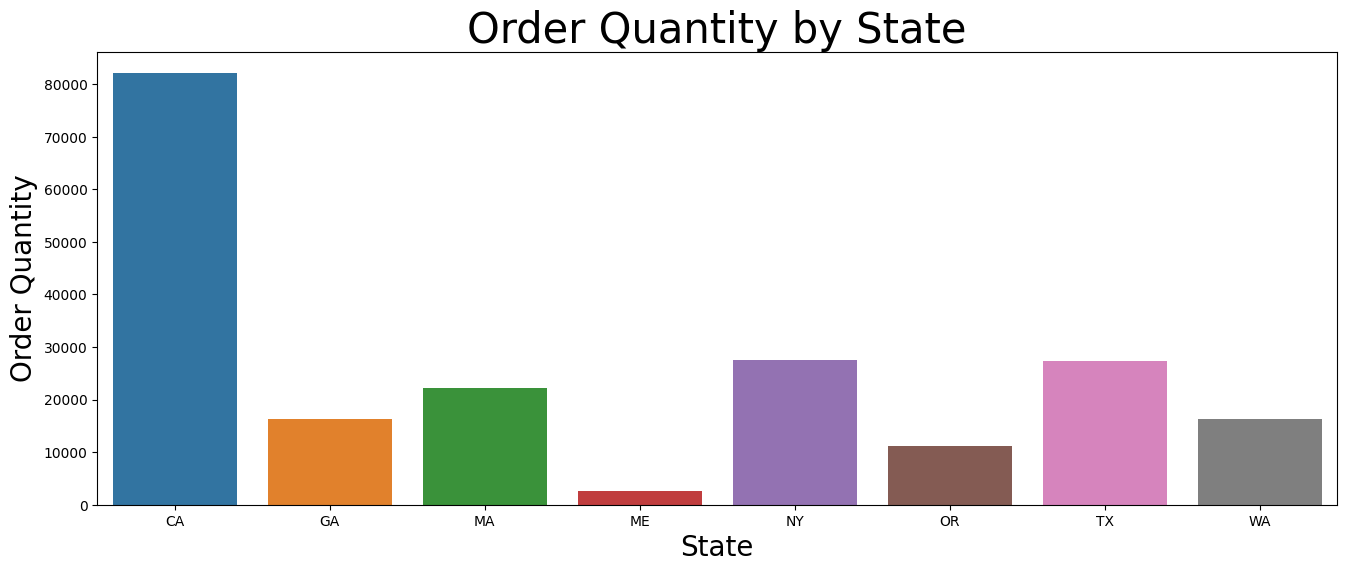

In [39]:
plt.figure(figsize = (16,6), dpi = 100)

sns.barplot(x = 'state', y = 'quantity ordered', data = total_ordered_state)
plt.title('Order Quantity by State', size = 30)
plt.ylabel('Order Quantity', size = 20)
plt.xlabel('State', size = 20);

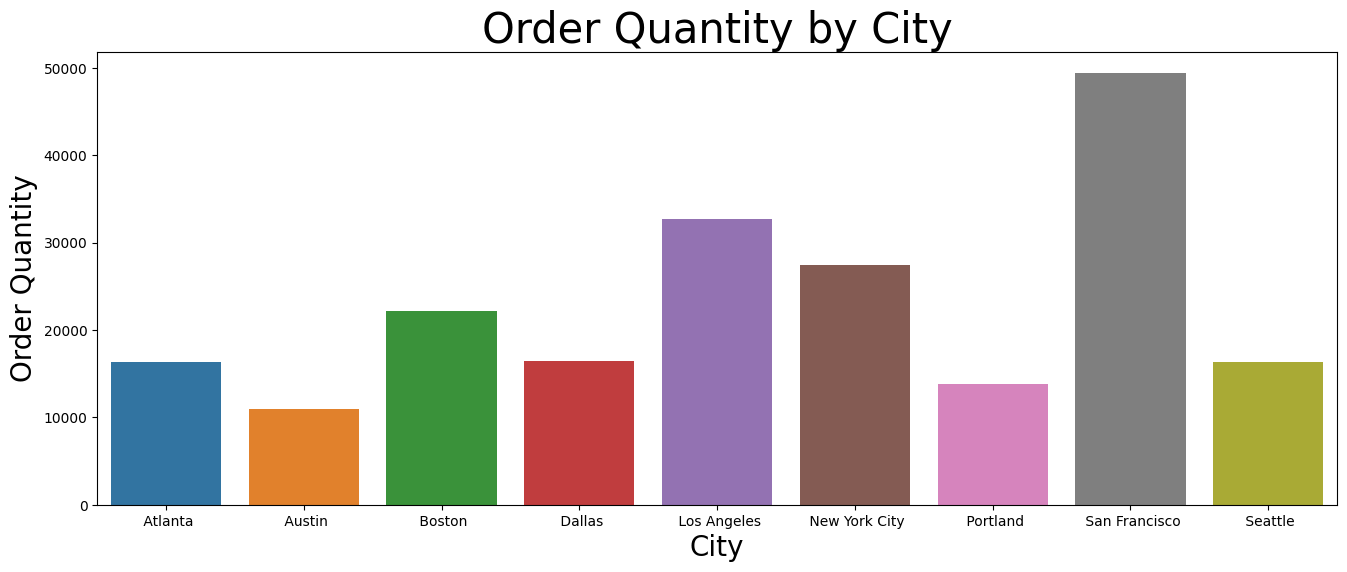

In [42]:
plt.figure(figsize = (16, 6), dpi = 100)
sns.barplot(x = 'city', y = 'quantity ordered', data = total_ordered_city)
plt.title('Order Quantity by City', size = 30)
plt.ylabel('Order Quantity', size = 20)
plt.xlabel('City', size = 20);

**Create a df for groupby order date**

In [43]:
total_order_month = df.groupby(df['order date'].dt.month ).sum()

total_order_month

,order id,quantity ordered,price each,order_total,address_id
order date,,,,,
1,1391148846,10670,1776155.79,1786511.29,477250640
2,1832181724,13162,2145208.87,2158127.48,346592316
3,2520234917,16697,2740393.12,2755969.40,868329900
4,3333217539,20226,3313522.35,3336376.42,1346954767
5,3289290354,18344,3084756.09,3101881.04,294941395
6,2876409942,14964,2508863.49,2524464.99,1322930233
7,3224356195,15781,2572764.75,2587444.91,1172969557
8,2840777365,13185,2178183.81,2191698.31,66070489
9,2886380303,12827,2038019.59,2050361.26,756164269


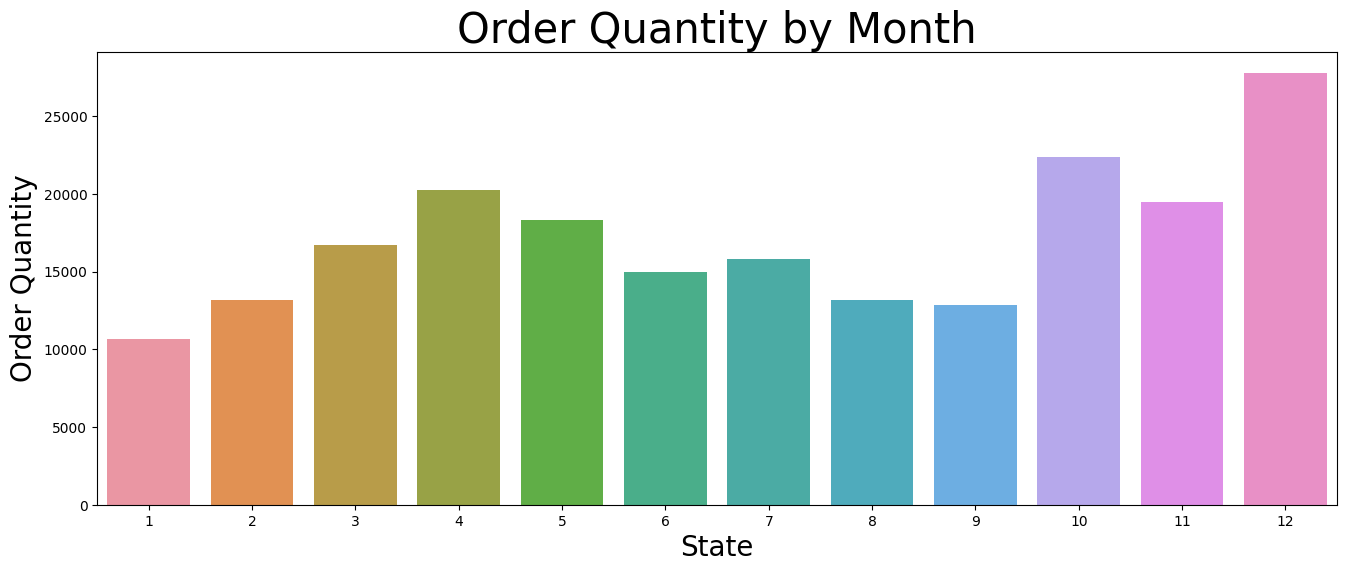

In [44]:
plt.figure(figsize = (16,6),dpi = 100)
plt.xticks(range(1,13))
sns.barplot(x = total_order_month.index, y = 'quantity ordered', data = total_order_month)

plt.title('Order Quantity by Month', size = 30)
plt.ylabel('Order Quantity', size = 20)
plt.xlabel('State', size = 20);

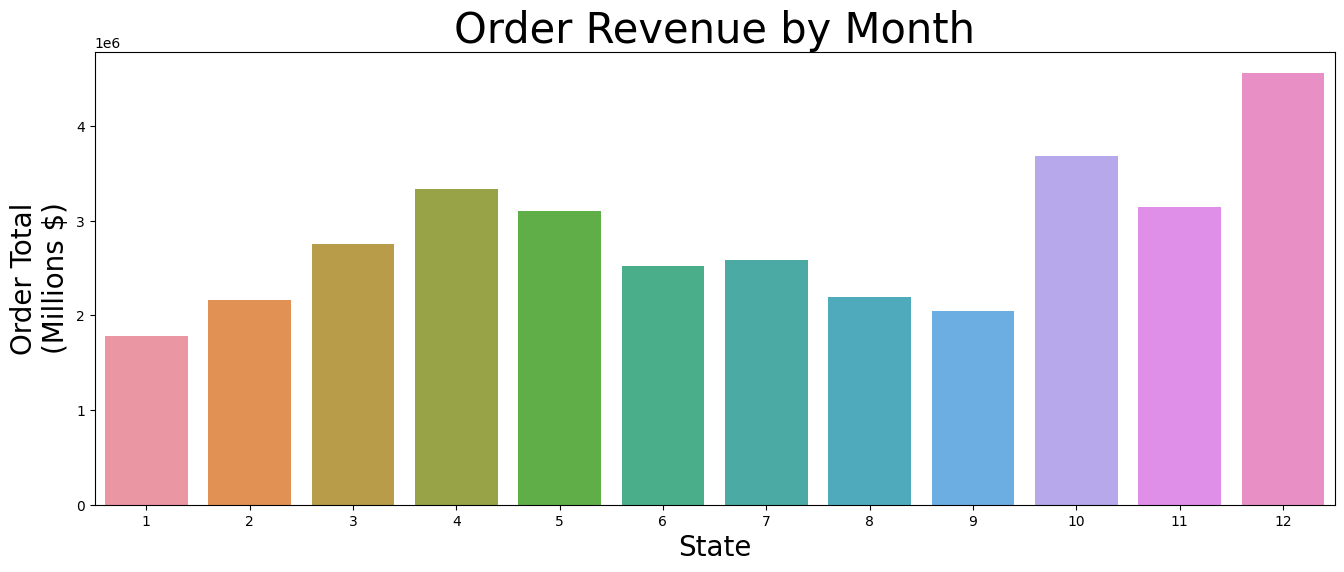

In [45]:
plt.figure(figsize = (16, 6),dpi = 100)

sns.barplot(x = total_order_month.index, y = 'order_total', data = total_order_month)

plt.title('Order Revenue by Month', size = 30)
plt.ylabel('Order Total' '\n' '(Millions $)', size = 20)
plt.xlabel('State', size = 20);

In [46]:
df.head()

,order id,product,quantity ordered,price each,order_total,order date,purchase address,city,state,address_id
0,236670,Wired Headphones,2,11.99,23.98,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",Seattle,WA,0
1,236671,Bose SoundSport Headphones,1,99.99,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",Dallas,TX,1
2,236672,iPhone,1,700.00,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",Portland,OR,2
3,236673,AA Batteries (4-pack),2,3.84,7.68,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",Los Angeles,CA,3
4,236674,AA Batteries (4-pack),2,3.84,7.68,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",New York City,NY,4


**Create a df to view orders by time of day**

In [ ]:
order_count_time = df.groupby(df['order date'].dt.hour, as_index = False)['quantity ordered'].count()   

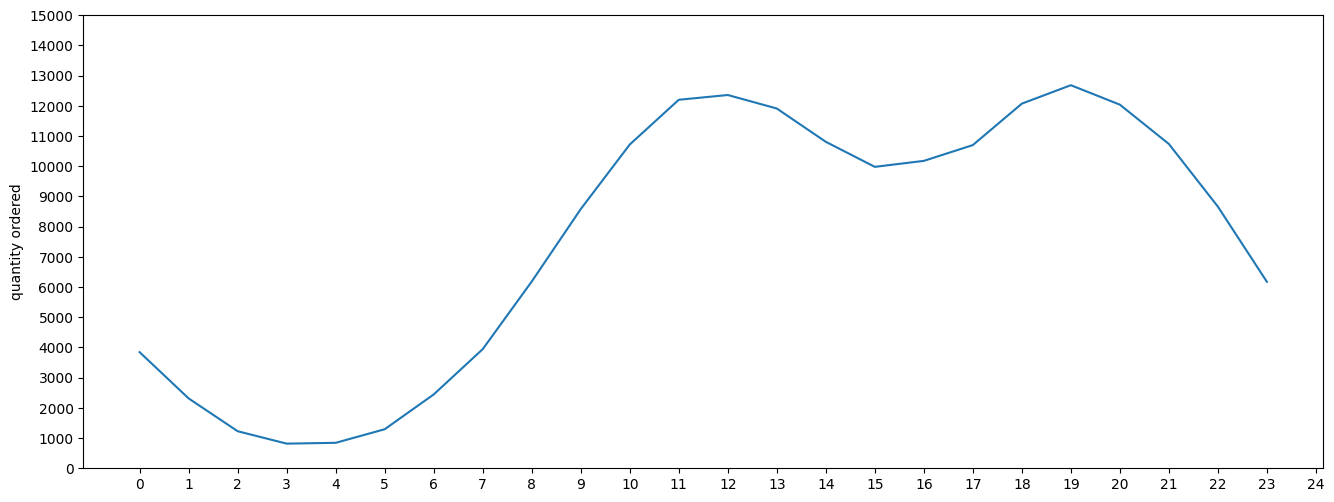

In [48]:
plt.figure(figsize = (16, 6),dpi = 100)
sns.lineplot(x = order_count_time.index, y = 'quantity ordered', data = order_count_time)
plt.xticks(range(0,25))
plt.yticks(range(0,16000,1000));